In [3]:
import numpy as np
import os

ids = np.array([1240610, 1210718, 1210702, 1200562, 6212124, 1200575, 1200570, 1200571, 1240903, 1210734, 1210707, 1200558, 1200554, 1210683, 7240919, 1210770, 1240566, 1240675])


In [4]:
from PIL import Image

def shift_image_left(image_path, shift_value):
    # Open the image
    image = Image.open(image_path)
    
    # Create a new image with the updated width
    new_image = Image.new(image.mode, (image.width, image.height))

    # Copy the original image onto the new image, shifted to the left
    new_image.paste(image, (-shift_value, 0))

    # Get the last column of the original image
    last_column = image.crop((image.width - 1, 0, image.width, image.height))

    # Paste the last column into the new columns
    for x in range(image.width - shift_value, image.width):
        new_image.paste(last_column, (x, 0, x + 1, image.height))

    # Return the shifted and filled image
    return new_image

def shift_image_right(image_path, shift_value):
    # Open the image
    image = Image.open(image_path)
        
    # Create a new image with the updated width
    new_image = Image.new(image.mode, (image.width, image.height))

    # Copy the original image onto the new image, shifted to the right
    new_image.paste(image, (shift_value, 0))

    # Get the first column of the original image
    first_column = image.crop((0, 0, 1, image.height))

    # Paste the first column into the new columns
    for x in range(shift_value):
        new_image.paste(first_column, (x, 0, x + 1, image.height))

    # Return the shifted and filled image
    return new_image

def rotate_image(image_path, angle):
    # Open the image
    image = Image.open(image_path)

    # Rotate the image
    rotated_image = image.rotate(angle, expand=True)

    # Create a new image with RGBA mode and transparent background
    new_image = Image.new("RGBA", rotated_image.size, (0, 0, 0, 0))

    # Paste the rotated image onto the new image
    new_image.paste(rotated_image, (0, 0), rotated_image)

    #Resize image to 200x200
    new_image = new_image.resize((200,200))

    # Return the rotated and filled image
    return new_image

def flip_image_horizontally(image_path):
    # Open the image
    image = Image.open(image_path)

    # Flip the image horizontally
    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)

    # Return the flipped image
    return flipped_image

def flip_image_vertically(image_path):
    # Open the image
    image = Image.open(image_path)

    # Flip the image vertically
    flipped_image = image.transpose(Image.FLIP_TOP_BOTTOM)

    # Return the flipped image
    return flipped_image

In [9]:
for stationFolder in ids:
    src_images_folder_path = 'dataset/images/'+str(stationFolder)+'/'
    dst_images_folder_path = 'left_20px_shifted_dataset/images/'+str(stationFolder)+'/'

    # Get a list of all the files in the current folder
    src_file_list = os.listdir(src_images_folder_path)
    dst_file_list = os.listdir(dst_images_folder_path)

    # Filter the list to only include folders files
    src_days_folders_list = [file for file in src_file_list if os.path.isdir(os.path.join(src_images_folder_path, file))]
    dst_days_folders_list = [file for file in dst_file_list if os.path.isdir(os.path.join(dst_images_folder_path, file))]

    
    for day_folder in src_days_folders_list:
        
        src_current_path = src_images_folder_path + day_folder
        dst_current_path = dst_images_folder_path + day_folder
        
        #Get a list of all files in the folder 
        files_list = os.listdir(src_current_path)
        
        # Filter the list to only include images files
        image_list = [file for file in files_list if file.endswith('.png')]
        for i in range(len(image_list)):
            
            image_path = os.path.join(src_current_path, image_list[i])
            fliped_image_path = os.path.join(dst_current_path, image_list[i])
            
            shift_image_left(image_path, 20).save(fliped_image_path)
            #img_np = np.array(image)
            

In [10]:
for stationFolder in ids:
    src_images_folder_path = 'dataset/images/'+str(stationFolder)+'/'
    dst_images_folder_path = 'right_20px_shifted_dataset/images/'+str(stationFolder)+'/'

    # Get a list of all the files in the current folder
    src_file_list = os.listdir(src_images_folder_path)
    dst_file_list = os.listdir(dst_images_folder_path)

    # Filter the list to only include folders files
    src_days_folders_list = [file for file in src_file_list if os.path.isdir(os.path.join(src_images_folder_path, file))]
    dst_days_folders_list = [file for file in dst_file_list if os.path.isdir(os.path.join(dst_images_folder_path, file))]

    
    for day_folder in src_days_folders_list:
        
        src_current_path = src_images_folder_path + day_folder
        dst_current_path = dst_images_folder_path + day_folder
        
        #Get a list of all files in the folder 
        files_list = os.listdir(src_current_path)
        
        # Filter the list to only include images files
        image_list = [file for file in files_list if file.endswith('.png')]
        for i in range(len(image_list)):
            
            image_path = os.path.join(src_current_path, image_list[i])
            fliped_image_path = os.path.join(dst_current_path, image_list[i])
            
            shift_image_right(image_path, 20).save(fliped_image_path)
            

In [6]:
for stationFolder in ids:
    src_images_folder_path = 'dataset/images/'+str(stationFolder)+'/'
    dst_images_folder_path = 'rotated_1degree__left_20px_shifted_dataset/images/'+str(stationFolder)+'/'

    # Get a list of all the files in the current folder
    src_file_list = os.listdir(src_images_folder_path)
    dst_file_list = os.listdir(dst_images_folder_path)

    # Filter the list to only include folders files
    src_days_folders_list = [file for file in src_file_list if os.path.isdir(os.path.join(src_images_folder_path, file))]
    dst_days_folders_list = [file for file in dst_file_list if os.path.isdir(os.path.join(dst_images_folder_path, file))]

    
    for day_folder in src_days_folders_list:
        
        src_current_path = src_images_folder_path + day_folder
        dst_current_path = dst_images_folder_path + day_folder
        
        #Get a list of all files in the folder 
        files_list = os.listdir(src_current_path)
        
        # Filter the list to only include images files
        image_list = [file for file in files_list if file.endswith('.png')]
        for i in range(len(image_list)):
            
            image_path = os.path.join(src_current_path, image_list[i])
            fliped_image_path = os.path.join(dst_current_path, image_list[i])
            
            #rotate image 1 degree and then shift it 20px to the left
            shift_image_left(image_path, 20).save(fliped_image_path)
            rotate_image(fliped_image_path, 1).save(fliped_image_path)
            
            

In [7]:
for stationFolder in ids:
    src_images_folder_path = 'dataset/images/'+str(stationFolder)+'/'
    dst_images_folder_path = 'rotated_1degree__right_20px_shifted_dataset/images/'+str(stationFolder)+'/'

    # Get a list of all the files in the current folder
    src_file_list = os.listdir(src_images_folder_path)
    dst_file_list = os.listdir(dst_images_folder_path)

    # Filter the list to only include folders files
    src_days_folders_list = [file for file in src_file_list if os.path.isdir(os.path.join(src_images_folder_path, file))]
    dst_days_folders_list = [file for file in dst_file_list if os.path.isdir(os.path.join(dst_images_folder_path, file))]

    
    for day_folder in src_days_folders_list:
        
        src_current_path = src_images_folder_path + day_folder
        dst_current_path = dst_images_folder_path + day_folder
        
        #Get a list of all files in the folder 
        files_list = os.listdir(src_current_path)
        
        # Filter the list to only include images files
        image_list = [file for file in files_list if file.endswith('.png')]
        for i in range(len(image_list)):
            
            image_path = os.path.join(src_current_path, image_list[i])
            fliped_image_path = os.path.join(dst_current_path, image_list[i])
            
            #rotate image 1 degree and then shift it 20px to the left
            shift_image_right(image_path, 20).save(fliped_image_path)
            rotate_image(fliped_image_path, 1).save(fliped_image_path)
            
            

In [8]:
for stationFolder in ids:
    src_images_folder_path = 'dataset/images/'+str(stationFolder)+'/'
    dst_images_folder_path = 'rotated_1degree_dataset/images/'+str(stationFolder)+'/'

    # Get a list of all the files in the current folder
    src_file_list = os.listdir(src_images_folder_path)
    dst_file_list = os.listdir(dst_images_folder_path)

    # Filter the list to only include folders files
    src_days_folders_list = [file for file in src_file_list if os.path.isdir(os.path.join(src_images_folder_path, file))]
    dst_days_folders_list = [file for file in dst_file_list if os.path.isdir(os.path.join(dst_images_folder_path, file))]

    
    for day_folder in src_days_folders_list:
        
        src_current_path = src_images_folder_path + day_folder
        dst_current_path = dst_images_folder_path + day_folder
        
        #Get a list of all files in the folder 
        files_list = os.listdir(src_current_path)
        
        # Filter the list to only include images files
        image_list = [file for file in files_list if file.endswith('.png')]
        for i in range(len(image_list)):
            
            image_path = os.path.join(src_current_path, image_list[i])
            fliped_image_path = os.path.join(dst_current_path, image_list[i])
            
            rotate_image(image_path, 1).save(fliped_image_path)            

dataset


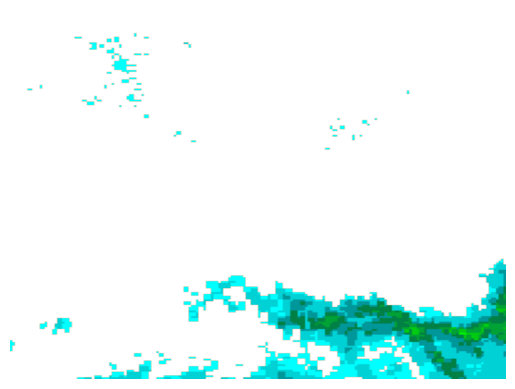

left_20px_shifted_dataset


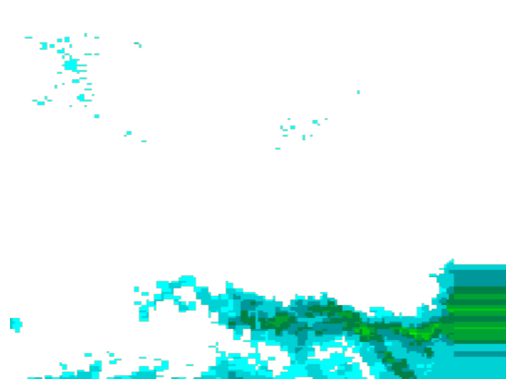

right_20px_shifted_dataset


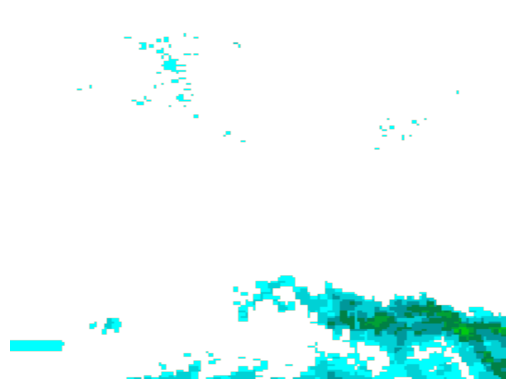

rotated_1degree_dataset


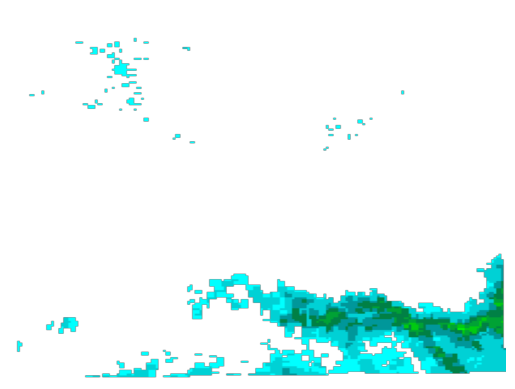

rotated_1degree__left_20px_shifted_dataset


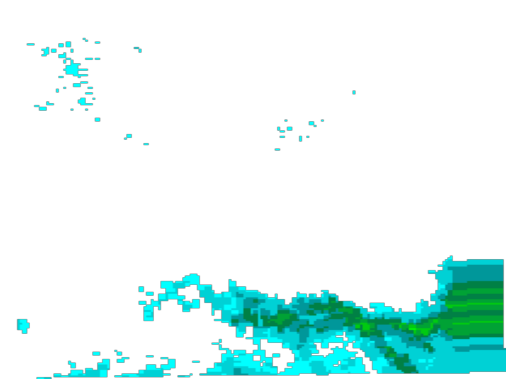

rotated_1degree__right_20px_shifted_dataset


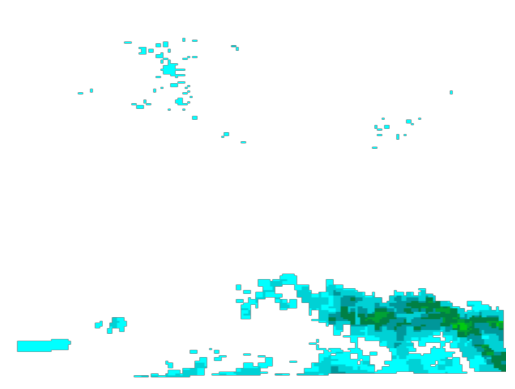

In [28]:
import matplotlib.pyplot as plt

def list_dataset_folders():
    folders = []
    folder_path = os.getcwd()
    for name in os.listdir(folder_path):
        if os.path.isdir(os.path.join(folder_path, name)):
            if name.endswith("dataset"):
                folders.append(name)
    return folders

datasets = list_dataset_folders()
#print the first image of each dataset
for dataset in datasets:
    image_path = dataset + '/images/1200554/2023-04-07/2023-04-07T2100.png'
    print(dataset)
    
    # Open the image using PIL
    image = Image.open(image_path)

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Add a frame around the image
    ax.imshow(image, aspect='auto', extent=(0, image.width, 0, image.height))
    ax.axis('off')

    # Display the image with the frame
    plt.show()

In [4]:
DADOS_ULTIMAS_3_HORAS = "https://api.ipma.pt/open-data/observation/meteorology/stations/obs-surface.geojson" #por exemplo se forem 9PM tem os dados entre 5PM e 7PM de hora a hora para todas as estações
local_tz = pytz.timezone('Europe/Lisbon') #Define o fuso horário local

def get_images_and_data_from_ipma():
    
    data = get_data(DADOS_ULTIMAS_3_HORAS)
    specific_datasets = list_dataset_folders()
    # Faz a requisição à apiEstacoes e à apiMeteo para obter as informações meteorológicas 
    final_result = {}
    for feature in data['features']:
        f.value+=1
        if feature['properties']['idEstacao']  in ids:
            station_data = feature['properties']
            id_estacao = station_data['idEstacao']
            # Converte a hora da estação para o fuso horário local
            date_time_utc = datetime.fromisoformat(station_data['time'])
            date_time = datetime.fromisoformat(station_data['time']).replace(tzinfo=pytz.utc).astimezone(local_tz)
            date_str, hour_str = date_time.strftime('%Y-%m-%d %H:%M').split()
            precipitation = station_data['precAcumulada']

            if date_str not in final_result:
                final_result[date_str] = {hour_str: precipitation}
            else:
                final_result[date_str][hour_str] = normalize_precipitation_value(max(0, precipitation))

            url_image = f"https://www.ipma.pt/resources.www/transf/radar/por/pcr-{date_time_utc.strftime('%Y-%m-%d')}T{date_time_utc.strftime('%H%M')}.png"
            response = requests.get(url_image)
            image_data = io.BytesIO(response.content)
            image = Image.open(image_data)
            #print(f"{url_image} ({hour_str}h)")
                    
            # remover os pixeis pretos 
            image = remove_black_pixels(image)

            # Cor-te da imagem
            region = image.crop(station_box_dict[id_estacao])
            for specific_dataset in specific_datasets:

                # verifica se a pasta id_estacao existe e cria se não existir
                if not os.path.exists(f"{specific_dataset}/images/{id_estacao}"):
                    os.makedirs(f"{specific_dataset}/images/{id_estacao}")

                # verifica se a pasta date_str existe e cria se não existir
                if not os.path.exists(f"{specific_dataset}/images/{id_estacao}/{date_str}"):
                    os.makedirs(f"{specific_dataset}/images/{id_estacao}/{date_str}")

                elif specific_dataset == 'dataset':
                    region.save(f"{specific_dataset}/images/{id_estacao}/{date_str}/{date_time.strftime('%Y-%m-%dT%H%M')}.png")
                    original_image_path = f"dataset/images/{id_estacao}/{date_str}/{date_time.strftime('%Y-%m-%dT%H%M')}.png"

                elif specific_dataset == 'left_20px_shifted_dataset':        
                    shift_image_left(original_image_path, 20).save(f"{specific_dataset}/images/{id_estacao}/{date_str}/{date_time.strftime('%Y-%m-%dT%H%M')}.png")
                    left_shifted_image_path = f"left_20px_shifted_dataset/images/{id_estacao}/{date_str}/{date_time.strftime('%Y-%m-%dT%H%M')}.png"

                elif specific_dataset == 'right_20px_shifted_dataset':        
                    shift_image_right(original_image_path, 20).save(f"{specific_dataset}/images/{id_estacao}/{date_str}/{date_time.strftime('%Y-%m-%dT%H%M')}.png")
                    right_shifted_image_path = f"right_20px_shifted_dataset/images/{id_estacao}/{date_str}/{date_time.strftime('%Y-%m-%dT%H%M')}.png"

                elif specific_dataset == 'rotated_1degree__left_20px_shifted_dataset':
                    rotate_image(left_shifted_image_path, 1).save(f"{specific_dataset}/images/{id_estacao}/{date_str}/{date_time.strftime('%Y-%m-%dT%H%M')}.png")

                elif specific_dataset == 'rotated_1degree__right_20px_shifted_dataset':
                    rotate_image(right_shifted_image_path, 1).save(f"{specific_dataset}/images/{id_estacao}/{date_str}/{date_time.strftime('%Y-%m-%dT%H%M')}.png")

                elif specific_dataset == 'rotated_1degree_dataset':
                    rotate_image(original_image_path, 1).save(f"{specific_dataset}/images/{id_estacao}/{date_str}/{date_time.strftime('%Y-%m-%dT%H%M')}.png")

                # Verifica se o arquivo JSON para esta estação já existe, se não, cria o arquivo
                filename = f"{specific_dataset}/precipitation/{id_estacao}.json"
                if not os.path.isfile(filename):
                    with open(filename, 'w') as file:
                        json.dump({}, file)

                # Carrega o conteúdo do arquivo JSON para a variável "precipitation_data"
                with open(filename, 'r') as file:
                    precipitation_data = json.load(file)

                # Adiciona as informações meteorológicas ao arquivo JSON
                for date in final_result:
                    if date not in precipitation_data:
                        precipitation_data[date] = final_result[date]
                    else:
                        precipitation_data[date].update(final_result[date])

                # Escreve o conteúdo atualizado no arquivo JSON
                with open(filename, 'w') as file:
                    json.dump(precipitation_data, file, indent=4)
    print("Dados atualizados com sucesso!")

NameError: name 'pytz' is not defined